<a href="https://colab.research.google.com/github/saiprem-eng/placement-predictor/blob/main/placement_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
df=pd.read_csv("/content/Job_Placement_Data.csv")
df.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


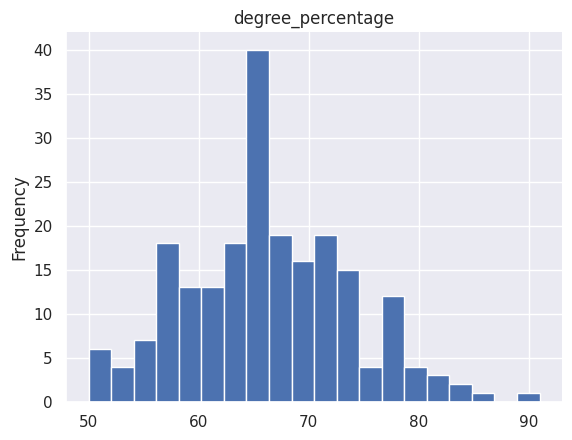

In [ ]:
# @title degree_percentage

from matplotlib import pyplot as plt
df['degree_percentage'].plot(kind='hist', bins=20, title='degree_percentage')
plt.gca().spines[['top', 'right',]].set_visible(False)

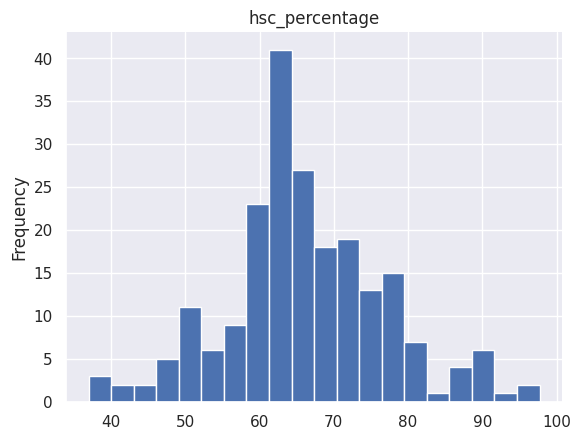

In [ ]:
# @title hsc_percentage

from matplotlib import pyplot as plt
df['hsc_percentage'].plot(kind='hist', bins=20, title='hsc_percentage')
plt.gca().spines[['top', 'right',]].set_visible(False)

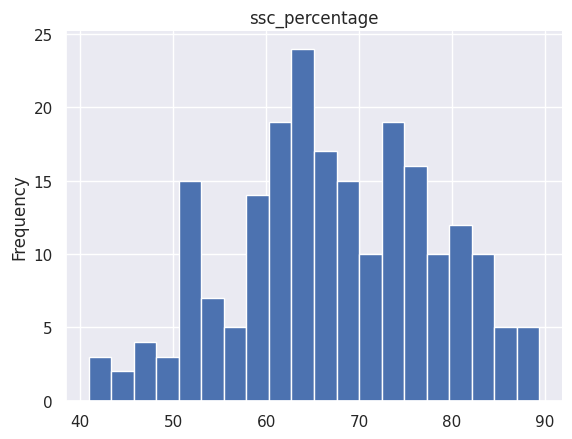

In [ ]:
# @title ssc_percentage

from matplotlib import pyplot as plt
df['ssc_percentage'].plot(kind='hist', bins=20, title='ssc_percentage')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), ['gender', 'ssc_board', 'hsc_board', 'hsc_subject' , 'undergrad_degree' ,'work_experience','specialisation', ])],
    remainder='passthrough'  # Keeps other columns unchanged
)

In [ ]:

# Fit and transform the data
transformed_data = ct.fit_transform(df)

# Option 1: Create a new DataFrame with transformed data
new_df = pd.DataFrame(transformed_data, columns=ct.get_feature_names_out())

# Option 2: Update the original DataFrame
df = pd.concat([df.reset_index(drop=True), pd.DataFrame(transformed_data, columns=ct.get_feature_names_out())], axis=1).drop(['gender', 'ssc_board', 'hsc_board', 'hsc_subject' , 'undergrad_degree' ,'work_experience','specialisation' ], axis=1)


In [ ]:
df.head()

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent,status,encoder__gender_F,encoder__gender_M,encoder__ssc_board_Central,encoder__ssc_board_Others,...,encoder__work_experience_No,encoder__work_experience_Yes,encoder__specialisation_Mkt&Fin,encoder__specialisation_Mkt&HR,remainder__ssc_percentage,remainder__hsc_percentage,remainder__degree_percentage,remainder__emp_test_percentage,remainder__mba_percent,remainder__status
0,67.00,91.00,58.00,55.0,58.80,Placed,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,67.0,91.0,58.0,55.0,58.8,Placed
1,79.33,78.33,77.48,86.5,66.28,Placed,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,79.33,78.33,77.48,86.5,66.28,Placed
2,65.00,68.00,64.00,75.0,57.80,Placed,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,65.0,68.0,64.0,75.0,57.8,Placed
3,56.00,52.00,52.00,66.0,59.43,Not Placed,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,56.0,52.0,52.0,66.0,59.43,Not Placed
4,85.80,73.60,73.30,96.8,55.50,Placed,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,85.8,73.6,73.3,96.8,55.5,Placed


In [ ]:
y=df["remainder__status"]
x=df.drop(columns=["status","remainder__status"],axis=1)



In [ ]:
y=pd.DataFrame(y)

In [ ]:
# Iterate over the rows of the DataFrame and modify the 'remainder__status' column
for index, row in y.iterrows():
  if row['remainder__status'] == "Placed":
    y.at[index, 'remainder__status'] = 1
  else:
    y.at[index, 'remainder__status'] = 0

In [ ]:
y= y["remainder__status"].astype('category')

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=47)

# ALGORITHM - LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
le=LogisticRegression()

In [ ]:
le.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
preds=le.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_lr=accuracy_score(y_test,preds)

In [ ]:
print(f"Accuracy : {accuracy_lr * 100}")

Accuracy : 79.06976744186046


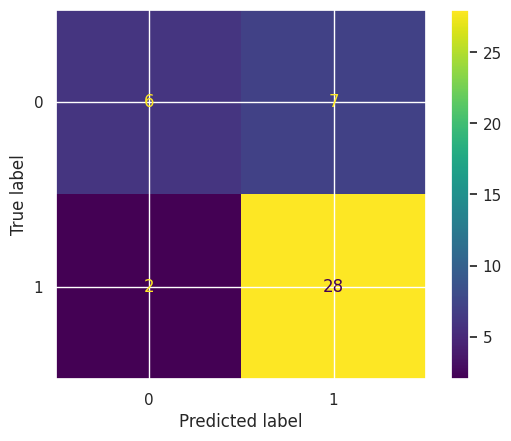

In [ ]:

cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# **ALGORITHM - K NEAREST NEIGHBOURS (KNN)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier()

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
preds_2=knn.predict(x_test)

In [ ]:
accuracy_knn=accuracy_score(y_test,preds_2)

In [ ]:
print(f"Accuracy : {accuracy_knn * 100}")

Accuracy : 79.06976744186046


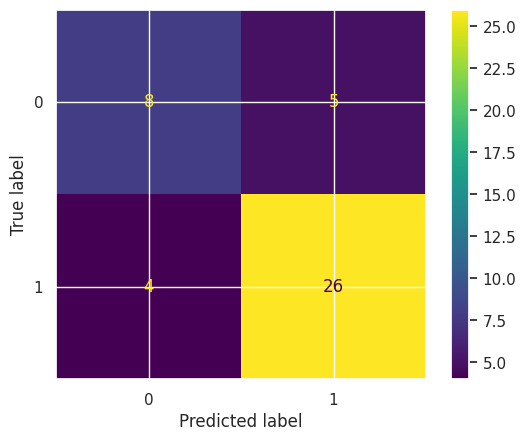

In [ ]:

cm = confusion_matrix(y_test, preds_2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# **ALGORITHM - SUPPORT VECTOR MACHINE (SVM)**

In [ ]:
from sklearn import svm

In [ ]:
clf=svm.SVC()

In [ ]:
clf.fit(x_train,y_train)

SVC()

In [ ]:
preds_3=clf.predict(x_test)

In [ ]:
accuracy_svm=accuracy_score(y_test,preds_3)

In [ ]:
print(f"Accuracy : {accuracy_svm * 100}")

Accuracy : 83.72093023255815


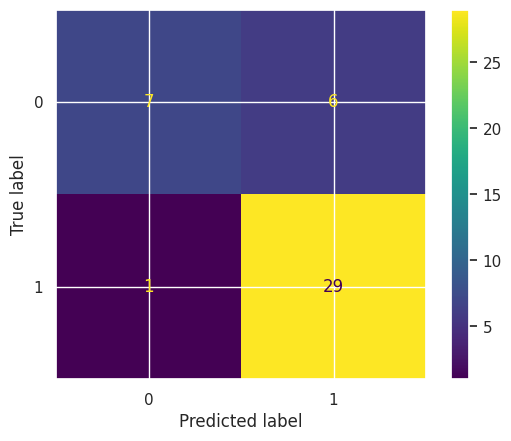

In [ ]:

cm = confusion_matrix(y_test, preds_3)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


# **ALGORITHM - DESICION TREES**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:

regr_2 = DecisionTreeRegressor(max_depth=5)

In [ ]:

regr_2.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [ ]:
preds_4_1=regr_2.predict(x_test)

In [ ]:

# Using round() function to convert probabilities
rounded_values_preds_4_1 = [round(prob) for prob in preds_4_1]

print(rounded_values_preds_4_1)


[1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1]


In [ ]:
accuracy_dtr1=accuracy_score(y_test,rounded_values_preds_4_1)

In [ ]:
print(f"Accuracy : {accuracy_dtr1 * 100}")

Accuracy : 72.09302325581395


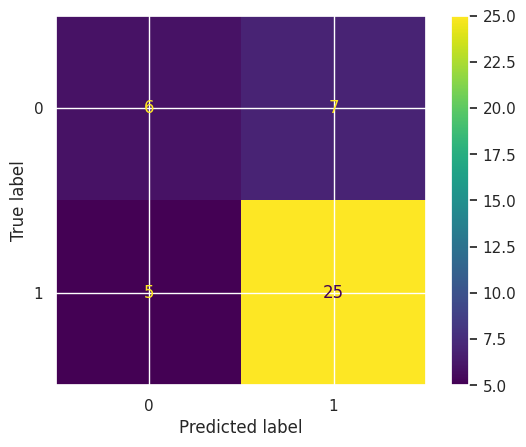

In [ ]:

cm = confusion_matrix(y_test, rounded_values_preds_4_1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


**Same algorithm but here with different parameter**

In [ ]:
regr_1 = DecisionTreeRegressor(max_depth=2)

In [ ]:
regr_1.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [ ]:
preds_4_2=regr_1.predict(x_test)

In [ ]:

# Using round() function to convert probabilities
rounded_values_preds_4_2 = [round(prob) for prob in preds_4_2]

print(rounded_values_preds_4_2)


[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1]


In [ ]:
accuracy_dtr2=accuracy_score(y_test,rounded_values_preds_4_2)

In [ ]:
print(f"Accuracy : {accuracy_dtr2 * 100}")

Accuracy : 81.3953488372093


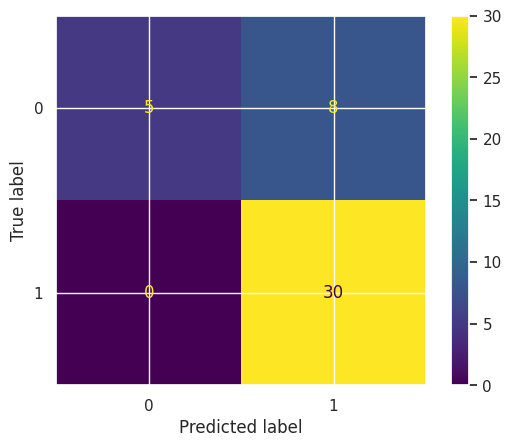

In [ ]:

cm = confusion_matrix(y_test, rounded_values_preds_4_2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


# **ALGORITHM - NAIVE BAYES (GAUSSIAN NAIVE BAYES)**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()

In [ ]:
gnb.fit(x_train, y_train)

GaussianNB()

In [ ]:
preds_gnb=gnb.predict(x_test)

In [ ]:
accuracy_gnb=accuracy_score(y_test,preds_gnb)

In [ ]:
print(f"Accuracy : {accuracy_gnb * 100}")

Accuracy : 79.06976744186046


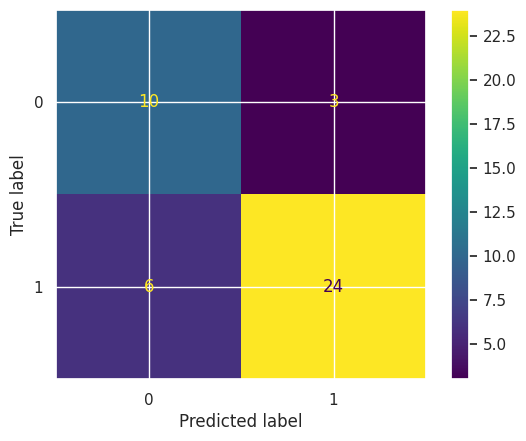

In [ ]:

cm = confusion_matrix(y_test, preds_gnb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


# **ALGORITHM - RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(x_train, y_train)


In [ ]:
preds_rndf=clf.score(x_test, y_test)


In [ ]:
accuracy_rndf=preds_rndf

In [ ]:
print(f"Accuracy : {accuracy_rndf * 100}")

Accuracy : 81.3953488372093


# **PLOTTING THE ACCURACIES OF DIFFERENT MODELS**

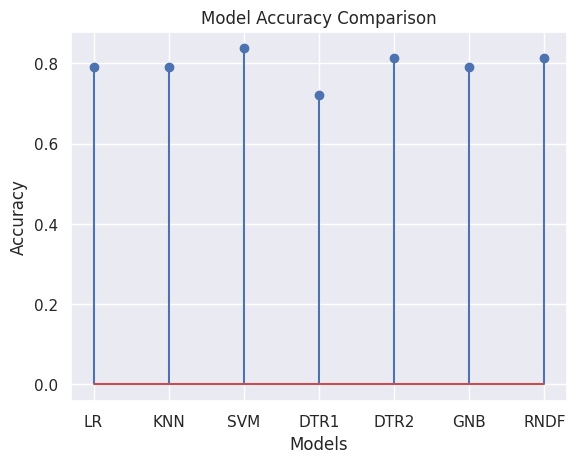

In [ ]:
import matplotlib.pyplot as plt # import the matplotlib library
import seaborn as sns # import the seaborn library
sns.set_theme() # set the theme of the plot


models = ['LR', 'KNN', 'SVM', 'DTR1', 'DTR2', 'GNB', 'RNDF'] # create a list of model names
accuracies = [accuracy_lr, accuracy_knn, accuracy_svm, accuracy_dtr1, accuracy_dtr2, accuracy_gnb, accuracy_rndf] # create a list of corresponding accuracies

plt.stem(models, accuracies) # use the models list for x-axis labels and accuracies for bar heights
plt.xlabel("Models") # set the x-axis label
plt.ylabel("Accuracy") # set the y-axis label
plt.title("Model Accuracy Comparison") # set the title of the plot
plt.show() # display the plot